### Building a Recommender system with Surprise

This try-it focuses on exploring additional algorithms with the `Suprise` library to generate recommendations.  Your goal is to identify the optimal algorithm by minimizing the mean squared error using cross validation. You are also going to select a dataset to use from [grouplens](https://grouplens.org/datasets/movielens/) example datasets.  

To begin, head over to grouplens and examine the different datasets available.  Choose one so that it is easy to create the data as expected in `Surprise` with user, item, and rating information.  Then, compare the performance of at least the `KNNBasic`, `SVD`, `NMF`, `SlopeOne`, and `CoClustering` algorithms to build your recommendations.  For more information on the algorithms see the documentation for the algorithm package [here](https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html).

Share the results of your investigation and include the results of your cross validation and a basic description of your dataset with your peers.



In [31]:
from surprise import Dataset, Reader, SVD, NMF, KNNBasic, SlopeOne, CoClustering
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
import seaborn as sns


import pandas as pd

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv',delimiter=",")
ratings = pd.read_csv('ml-latest-small/ratings.csv',delimiter=",").set_index('userId')
#ratings = ratings.sample(frac=.3, random_state=1)


In [3]:
print(movies.head())
print(movies.shape)



   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
(9742, 3)


In [4]:
print(ratings.head(10))
#print(ratings.query('movieId == 1'))
print(ratings.shape)

        movieId  rating  timestamp
userId                            
1             1     4.0  964982703
1             3     4.0  964981247
1             6     4.0  964982224
1            47     5.0  964983815
1            50     5.0  964982931
1            70     3.0  964982400
1           101     5.0  964980868
1           110     4.0  964982176
1           151     5.0  964984041
1           157     5.0  964984100
(100836, 3)


In [ ]:

new_ratings = pd.merge(ratings.reset_index(), movies[['movieId', 'title']], on='movieId', how='inner')
print(new_ratings.head(20))
print(new_ratings.shape)


In [6]:
a = new_ratings[['userId','title','rating']]
reader = Reader(rating_scale=(0,5))
sf = Dataset.load_from_df(a,reader)
train = sf.build_full_trainset()
print(type(sf),type(train), train.n_ratings)

<class 'surprise.dataset.DatasetAutoFolds'> <class 'surprise.trainset.Trainset'> 100836


In [7]:
svd_model = SVD(n_factors=2)
svd_model.fit(train)

In [8]:
test = train.build_testset()
predictions_list = svd_model.test(test)
print(predictions_list[:3])

[Prediction(uid=1, iid='Toy Story (1995)', r_ui=4.0, est=4.690937803610566, details={'was_impossible': False}), Prediction(uid=1, iid='Grumpier Old Men (1995)', r_ui=4.0, est=4.007700684860909, details={'was_impossible': False}), Prediction(uid=1, iid='Heat (1995)', r_ui=4.0, est=4.7155227767828505, details={'was_impossible': False})]


In [9]:
svd_cross_val_results = cross_validate(svd_model,sf,measures=['RMSE'])
print(svd_cross_val_results)

{'test_rmse': array([0.87470307, 0.87120245, 0.87035677, 0.87486948, 0.85966131]), 'fit_time': (0.08022689819335938, 0.07386302947998047, 0.06936788558959961, 0.06888294219970703, 0.06901311874389648), 'test_time': (0.06292986869812012, 0.025393009185791016, 0.024606943130493164, 0.05880904197692871, 0.02447509765625)}


In [ ]:
clustering = CoClustering(n_epochs=5,n_cltr_u=1000)
clustering.fit(train)
clustering_predictions = clustering.test(test)
predictions_list

In [11]:
clustering_cross_val_results = cross_validate(clustering,sf,measures=['RMSE'],n_jobs=-1)
print(clustering_cross_val_results)

{'test_rmse': array([0.95929807, 0.96717498, 0.95902621, 0.96578999, 0.9648401 ]), 'fit_time': (3.769735813140869, 3.7775449752807617, 3.7594058513641357, 3.770475149154663, 3.7641148567199707), 'test_time': (0.033264875411987305, 0.0344700813293457, 0.03582000732421875, 0.03319692611694336, 0.03304290771484375)}


In [12]:
slope_model = SlopeOne()
slope_model.fit(train)
slope_predictions = slope_model.test(test)
print(slope_predictions[:3])

[Prediction(uid=1, iid='Toy Story (1995)', r_ui=4.0, est=4.711895386434586, details={'was_impossible': False}), Prediction(uid=1, iid='Grumpier Old Men (1995)', r_ui=4.0, est=3.922677009784783, details={'was_impossible': False}), Prediction(uid=1, iid='Heat (1995)', r_ui=4.0, est=4.602541510092789, details={'was_impossible': False})]


In [13]:
slope_cross_val_results = cross_validate(slope_model,sf,measures = ['RMSE'],n_jobs=-1,cv=5)

print(slope_cross_val_results)

{'test_rmse': array([0.90634725, 0.90551732, 0.89728644, 0.90344135, 0.89840488]), 'fit_time': (0.9596309661865234, 0.9590668678283691, 0.9444699287414551, 0.9481830596923828, 0.9770612716674805), 'test_time': (1.3552229404449463, 1.3612651824951172, 1.3486311435699463, 1.3491320610046387, 1.348665714263916)}


In [14]:
nmf_model = NMF()

In [15]:
nmf_model.fit(train)
nmf_predictions = nmf_model.test(test)

In [16]:
nmf_cross_val_results = cross_validate(nmf_model,sf,measures=['RMSE'],n_jobs=-1,cv=5)
print(slope_cross_val_results)

{'test_rmse': array([0.90634725, 0.90551732, 0.89728644, 0.90344135, 0.89840488]), 'fit_time': (0.9596309661865234, 0.9590668678283691, 0.9444699287414551, 0.9481830596923828, 0.9770612716674805), 'test_time': (1.3552229404449463, 1.3612651824951172, 1.3486311435699463, 1.3491320610046387, 1.348665714263916)}


In [17]:
knn_model = KNNBasic(k=40)
knn_model.fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [18]:
knn_predictions = knn_model.test(test)
print(knn_predictions[:3])

[Prediction(uid=1, iid='Toy Story (1995)', r_ui=4.0, est=4.194241094435477, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid=1, iid='Grumpier Old Men (1995)', r_ui=4.0, est=3.537846642835428, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid=1, iid='Heat (1995)', r_ui=4.0, est=4.137272151175017, details={'actual_k': 40, 'was_impossible': False})]


In [19]:
knn_cross_val_results = cross_validate(knn_model,sf,measures=['RMSE'],cv=5,n_jobs=-1)
print(knn_cross_val_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.95288556, 0.9469216 , 0.94264606, 0.94893381, 0.95164896]), 'fit_time': (0.020975112915039062, 0.021445274353027344, 0.02181696891784668, 0.021139860153198242, 0.02005290985107422), 'test_time': (0.3060300350189209, 0.3054490089416504, 0.30852723121643066, 0.30466699600219727, 0.29813408851623535)}


In [20]:
params = {
    'n_factors': [10,15,20],
    'n_epochs':[50,150,250],
    'reg_pu': [.001,.015,.06],
    'reg_qi': [.001,.015,.06]

}

In [21]:
nmf_gridSearch = GridSearchCV(NMF, param_grid=params, measures=['rmse'],cv=5,n_jobs=-1,return_train_measures=True)
nmf_gridSearch.fit(sf)

print(nmf_gridSearch.best_score)
print(nmf_gridSearch.best_params)

{'rmse': 0.920309202466988}
{'rmse': {'n_factors': 20, 'n_epochs': 50, 'reg_pu': 0.06, 'reg_qi': 0.06}}


In [28]:
bar_plots = {
    
    'slopeOne': max(slope_cross_val_results['test_time']),
    'knn_basic': max(knn_cross_val_results['test_rmse']),
    'nmf': max(nmf_cross_val_results['test_rmse']),
    'clustering':max(clustering_cross_val_results['test_rmse']),
    'svd':max(svd_cross_val_results['test_rmse']),
}

In [29]:
print(bar_plots)

{'slopeOne': 1.3612651824951172, 'knn_basic': 0.95288555581061, 'nmf': 0.9304054357743453, 'clustering': 0.9671749755422602, 'svd': 0.8748694808534363}


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

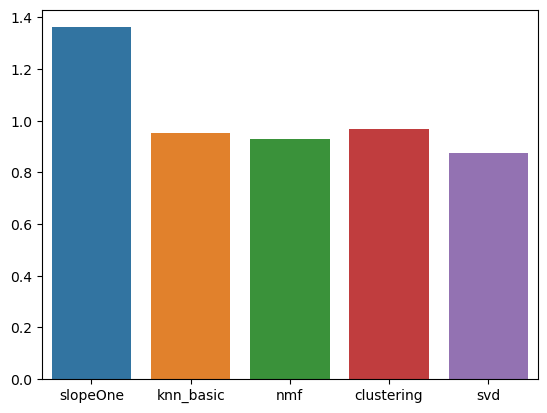

In [30]:

keys = list(bar_plots.keys())

vals = [float(bar_plots[k]) for k in keys]


sns.barplot(x=keys,y=vals)